# Systems and Signals 414 Practical 1: Sampling of continuous-time signals

**Aim:** Exposure to sampled signals and their quirks, specifically (a) a periodic frequency representation,
and (b) the fact that the period of a sampled periodic signal is not necessarily the inverse of its frequency.

**Hand in:** Please hand in this notebook as a PDF file on sunlearn by Sunday, 18 February at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook). After exporting your notebook, upload the PDF by clicking on `Practical 1 submission` on sunlearn and following the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a Numpy or Scipy function, go look up the usage at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [14]:
#All the necessary imports
%matplotlib inline
import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

pl.rcParams['figure.figsize'] = (9,3)


def setup_plot(title, y_label='', x_label='', newfig=True):
    """Setup a proper plot."""
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)

def add_top_axis(x_values, x_label=''):
    """Plot an additional x-axis at the top."""
    _, b = pl.rcParams['figure.figsize']
    pl.gca().title.set_position([.5, 1.18])
    ax1 = pl.gca()
    ax2 = ax1.twiny()
    ax2.margins(*(pl.array(ax1.margins())))
    ln, = ax2.plot(x_values, np.zeros_like(x_values)) # Create a dummy plot
    ln.remove()
    ax2.set_xlabel(x_label)
    
def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    """Open or download audio and return it as an array."""
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

**Hints:** Plot “continuous-time” signals with Matplotlib's `plot` function, and discrete-time signals with `stem` instead. For example `pl.plot(np.arange(10))` and `pl.stem(np.arange(10))`.

Have you ever wondered why [$\pi$ feels so awkward](https://www.youtube.com/watch?v=2hhjsSN-AiU)? Join the [“one revolution”](http://tauday.com/tau-manifesto).

## Questions


### Question 1
**1.1)** Plot (using `pl.plot`) the continuous-time signal $$x(t)=20\sin(100 \cdot 2 \pi t)$$ on a time-axis from $0$ to $0.02$ seconds. Plot enough points to make the signal appear continuous.<br>**Applicable** `np.sin`, `np.linspace`, `setup_plot`, and `pl.plot`.

**1.2)** Given a sampling frequency of $f_s = 2000\,{\rm Hz}$, plot (using `pl.stem`) the first 40 samples, $n = 0, 1, \ldots, 39$, for the discrete-time signal $x[n]$, as sampled from a continuous-time signal
$$x(t)=20\sin(100 \cdot 2 \pi t).$$
The bottom axis should be in seconds (corresponding to the original continuous-time signal) and the top axis should be in samples. A limitation of `add_top_axis` is that it should only be used after calling `pl.plot` or `pl.stem`. Note that the time information is not inherently present in a discrete-time signal and isn't always known.<br>**Applicable**  `np.sin`, `np.linspace` and/or `np.range`, `setup_plot`, `pl.plot`, `add_top_axis`.

**1.3)** Repeat Question 1.2, for continuous-time signals of different frequencies. Use the function $$x(t)=20\sin(F \cdot 2 \pi t)$$ evaluated at different frequencies $$F = 0, 100, 900, 1000, 1100, 1900, 2000,\ {\rm and}\ 
2100\,{\rm Hz}.$$ The frequency of the sinusoid must appear in the plot title. For displaying purposes, it might be useful to set any value of $-10^{-10} <x[n]<10^{-10}$ equal to zero (hint: `x[(x>-1e-10) * (x<1e-10)] = 0`). For each of the signals, explain your
observations; you can write this in a separate cell using Markdown.<br>**Applicable**  `np.sin`, `np.linspace` and/or `np.range`, `setup_plot`, `pl.plot`, `add_top_axis`.

**1.4)** How would you determine the digital frequency $f_\omega$ (cycles/sample) in the above cases? Verify your plots by determining the function $$x[n] = A \sin(f_\omega \cdot 2\pi n)$$ directly for one of the
above cases.

### Question 2

You probably would have wondered about the strange shape of the sampled $900\,{\rm Hz}$
signal in Question 1.3.
Sample this signal again, but this time let $$n = 0, . . . , 799\ \ {\rm and}\ \ f_s = 40000\,{\rm Hz}.$$
Plot the result using `pl.plot` together with your previous version (plotted with `pl.stem` in Question 1.3) on the same axes.
Comment on the result. (Repeat this process for the other signals above to obtain extra insight.)

### Question 3
**3.1)** Again, given a sampling frequency of $f_s = 2000\,{\rm Hz}$, plot (using `pl.stem`) the first 40 samples, $n = 0, 1, \ldots, 39$, for the discrete-time signal $x[n]$, as sampled from a continuous-time signal
$$x(t) = 10 \sin(100\cdot 2\pi t)+ 10 sin(2100 \cdot 2 \pi t).$$ Use the same axis setup as in Question 1. Explain your observations.

**3.2)** As a separate plot, repeat Question 3.1, but with 800 samples, $f_s = 40000\,{\rm Hz}$, and using `pl.plot`.

**3.3)** What are the periods $T_p$ (in seconds) of the continuous-time
$100\,{\rm Hz}$ and $2100\,{\rm Hz}$ signals $x(t)$ above?

**3.4)**  What are the periods $N_p$ (in samples) of their sampled versions
$x[n]$? (No, the sampled $900\,{\rm Hz}$  signal does not have a period of $2.2$. Make sure that $x[n + N_p] =
x[n], \forall n.)$

**3.5)**  What is the equivalent period in terms of seconds? Explain! 

**3.6)**  What would $N_p$ be for 
$\omega = 900
\,{\rm rad/s}$? (No, it is not $13.96$.)

### Question 4
A discrete-time Fourier transform (DTFT) signal is continuous and periodic with a time-agnostic frequency variable as $f_\omega$ or $\omega$. In this question we will estimate the DTFT of $x[n]$, the discrete-time signal with parameters $f_s = 2000\,{\rm Hz}$ and $n = 0,1,\ldots,39$, sampled from the continuous time signal
$$x(t) = 10 \sin(100\cdot 2\pi t)+ 10 sin(400 \cdot 2 \pi t).$$

Using the definition of the DTFT:
$$X(f_\omega) = \sum^\infty_{n=-\infty} x[n] e^{-j 2 \pi f_\omega n},$$
and using a numpy array of about 1000 or so linearly spaced values between $-0.5$ and $1.5$ as a replacement for $f_\omega$, estimate $X(f_\omega)$ for $\frac{1}{2} < f_\omega < \frac{3}{2}$ by taking the summation above only over the $40$ samples of $x[n]$. Plot the magnitude $|X(f_\omega)|$ (using `pl.plot`) with the bottom axis as $f_\omega$, and the top axis as $\omega$.

Why do you think we observe the side lobes?

# Coding examples:
**Plotting an additional axis**

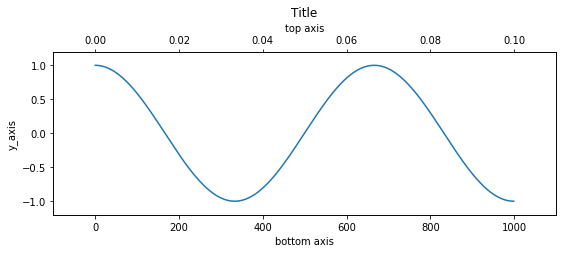

In [15]:
#Normal plot with matplotlib plot and setup_plot helper
setup_plot('Title', 'y_axis', 'bottom axis')
pl.plot(np.arange(1000), np.cos(np.linspace(0, 3*np.pi, 1000)));

#Add an extra x-axis at the top with 1e-4 scale
add_top_axis(np.arange(1000)*1e-4, 'top axis')

**Note the difference between linspace and arange:**

In [16]:
#Every second element from 0 upto (but excluding) 10
print(np.arange(0,10,2))

#5 elements from 0 upto (but excluding) 10
print(np.linspace(0,10,5,False))

#5 elements from 0 upto 10 (avoid!!!)
print(np.linspace(0,10,5))

[0 2 4 6 8]
[0. 2. 4. 6. 8.]
[ 0.   2.5  5.   7.5 10. ]


#### Audio player with Ipython.lib.display.Audio

In [17]:
example_signal = np.sin(2*np.pi*500*np.linspace(0,5,50000))
IPython.lib.display.Audio(rate=10000,
                          data=example_signal)

#### Plotting the spectrum of a signal

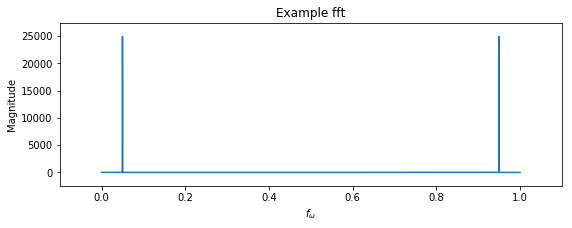

In [18]:
#Plotting the spectrum of a signal
example_fft = np.fft.fft(example_signal) 
example_fw_axis = np.linspace(0, 1, len(example_fft), False)

setup_plot('Example fft', 'Magnitude', '$f_\omega$')
pl.plot(example_fw_axis, np.abs(example_fft));

# Answer space:

Question 1.1

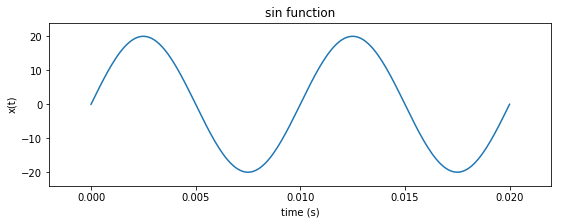

In [19]:
setup_plot(title = "sin function", y_label = "x(t)", x_label = "time (s)")

x = np.linspace(0, 0.02, 201)
pl.plot(x, 20 * np.sin(200* np.pi * x))
pl.show()

Question 1.2

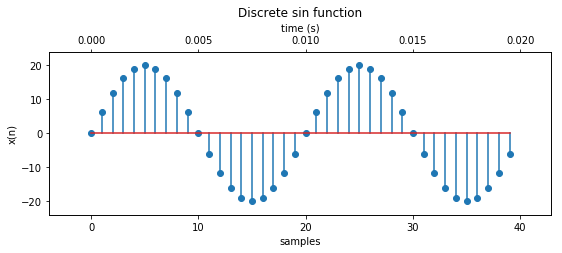

In [20]:
fs = 2000
Ts = 1/fs
steps = 40

setup_plot(title = "Discrete sin function", y_label = "x(n)", x_label = "samples")
y = []
ni = []

for x in range(steps):
    y.append(20 * np.sin(200 * np.pi * Ts * x))
    ni.append(x * Ts )
    
pl.stem(y)
add_top_axis(ni, 'time (s)') # DOESN'T SEEM TO WORK!

pl.show()

Question 1.3

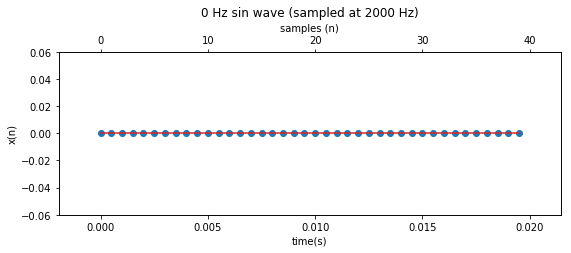

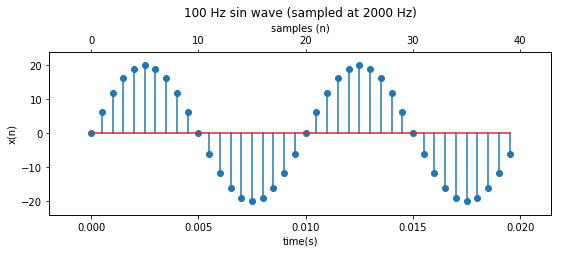

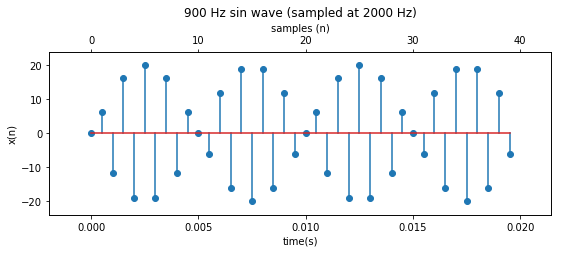

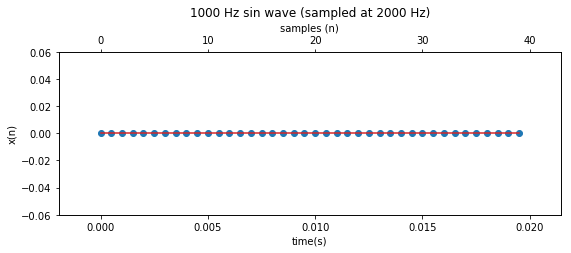

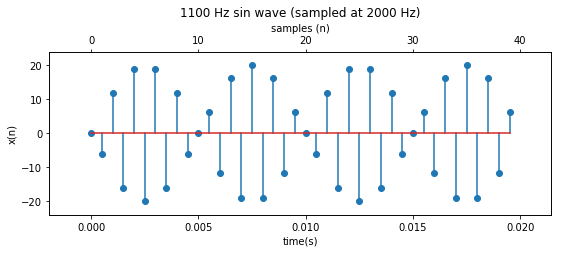

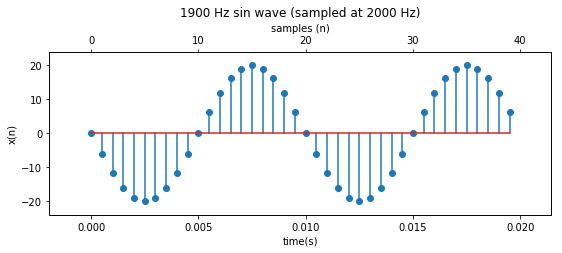

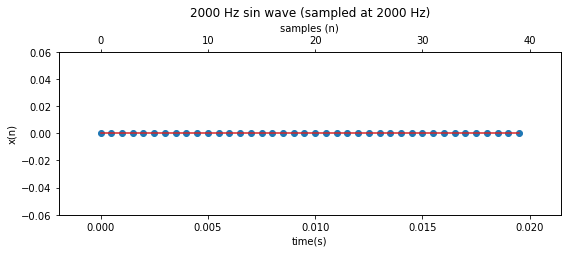

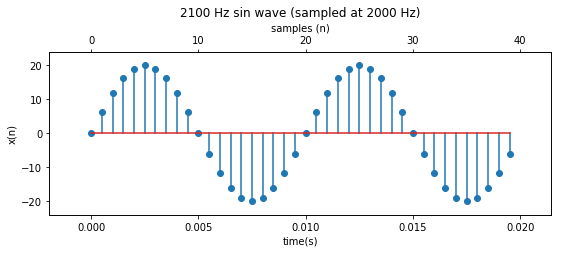

In [21]:
F = [0, 100, 900, 1000, 1100, 1900, 2000, 2100]

t_axis = np.linspace(0, steps * Ts, steps, False)
s_axis = np.arange(0, steps, 1)

for fre in F:
    x = 20 * np.sin(2 * fre * np.pi * t_axis)

    for counter in range(x.size):
        if -10e-10 < x[counter] < 10e-10:
            x[counter] = 0

    setup_plot(('%d Hz sin wave (sampled at %d Hz)' % (fre, fs)), "x(n)", "time(s)")
    pl.stem(t_axis, x)
    add_top_axis(s_axis, "samples (n)")

0Hz:
The function will never oscillate as the sine function will not change from 0 (sin(0) = 0)

100Hz:
The signal is being sampled at a rate much higher than the frequency (20 times) - hence the signal is shown without aliasing

900Hz:
The signal looks odd, however the sampling is 2.2 times faster than the signal, thus no aliasing

1000Hz: 
The signal is sampling at 2 times faster than the frequency, the signal has completely dissapeared - hence aliased away

1100Hz:
Aliasing is now starting to take affect on the signal - the original signal is near to gone. The sampling rate is now 1.82 times faster than the frequency

1900Hz:
The signal now looks inverted - however this is completely due to aliasing so the original signal is completely gone. The sampling rate is 1.05 times fasten than the frequency now

2000Hz:
The sampling now occurs at the same frequency as the signal - thus the signal cancels out to 0.

2100Hz:
Sampling is now slower than the signal's frequency. The signal looks mostly normal, however the rate is slightly incorrect, thus aliasing is again present.

Question 1.4

In [22]:
fw = []
for f in F:
    fw.append(f/fs)
print(fw)

[0.0, 0.05, 0.45, 0.5, 0.55, 0.95, 1.0, 1.05]


The above uses the formula $$f_w = f/f_s$$. The final example shows that there is more than one cycle per sample - hence aliasing is present. $$x[n] = A sin(f_w 2 \pi n) = A sin(2.1 \pi n)$$

Question 2

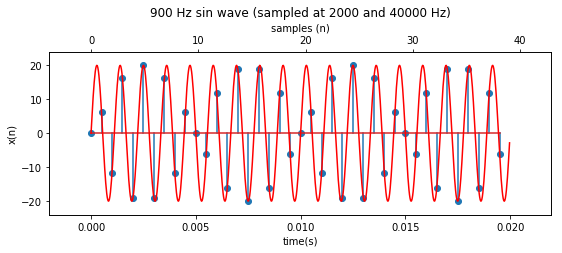

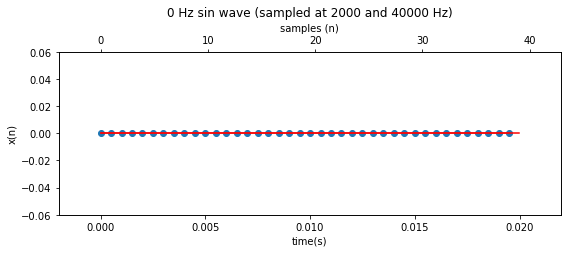

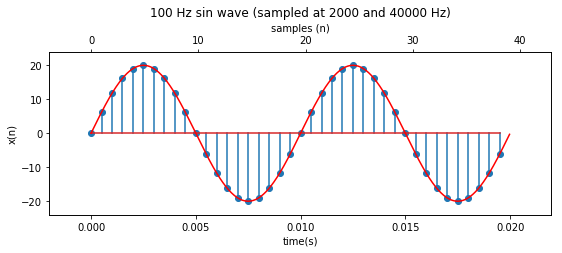

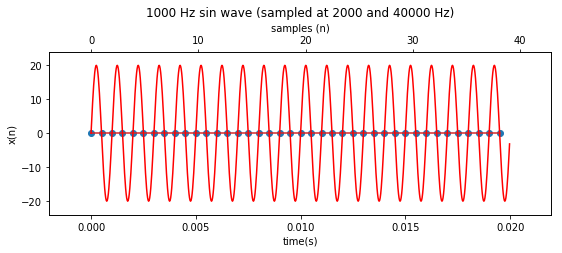

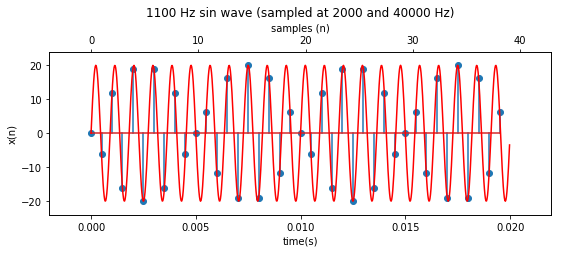

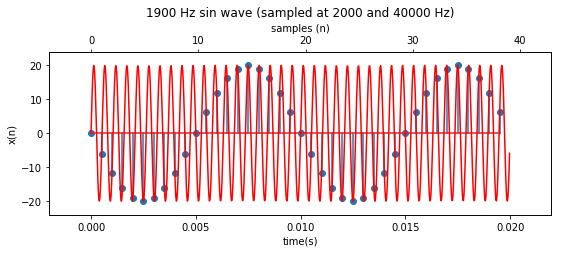

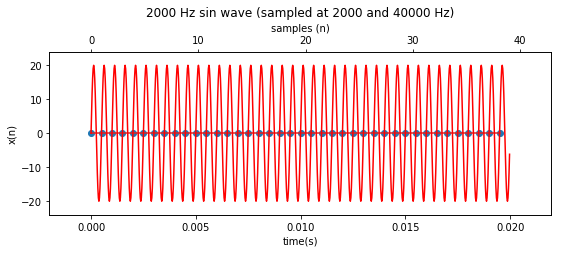

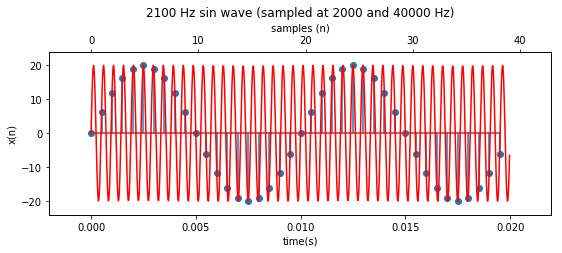

In [23]:
F = [900,0 , 100, 1000, 1100, 1900, 2000, 2100]

fs2 = 2000
fs4 = 40000
Ts2 = 1/fs2
Ts4 = 1/fs4

t_axis2 = np.linspace(0, 40 * Ts2, 40, False)
t_axis4 = np.linspace(0, 800 * Ts4, 800, False)

s_axis = np.arange(0, 40, 1)

for fre in F:
    x2 = 20 * np.sin(2 * fre * np.pi * t_axis2)
    x4 = 20 * np.sin(2 * fre * np.pi * t_axis4)

    for counter in range(x2.size):
        if -10e-10 < x2[counter] < 10e-10:
            x2[counter] = 0

    setup_plot(('%d Hz sin wave (sampled at %d and %d Hz)' % (fre, fs2, fs4)), "x(n)", "time(s)")
    pl.stem(t_axis2, x2)
    pl.plot(t_axis4, x4, color = "red")
    add_top_axis(s_axis, "samples (n)")

We can now see that the discretisation is not frequent enough to indicate the continuos signal (40kHz sample) correctly. The affects of aliasing are now clear, as most of the data is lost.

Question 3.1

<Container object of 3 artists>

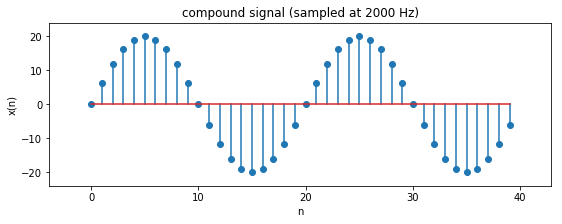

In [24]:
fs = 2000
Ts = 1/fs
n = 40

t_axis = np.linspace(0, n * Ts, n, False)
s_axis = np.arange(0, n, 1)

x = (10 * np.sin(2 * 100 * np.pi * t_axis)) + (10 * np.sin(2 * 2100 * np.pi * t_axis))

setup_plot(('compound signal (sampled at %d Hz)' % (fs)), "x(n)", "n")
pl.stem(s_axis, x)

The 100 Hz component can clearly be seen, hoever the sampling rate is not fast enough to show the 2100Hz signal which is added.

Question 3.2

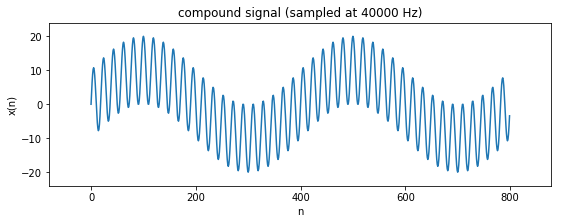

In [25]:
fs = 40000
Ts = 1/fs
n = 800

t_axis = np.linspace(0, n * Ts, n, False)
s_axis = np.arange(0, n, 1)

x = (10 * np.sin(2 * 100 * np.pi * t_axis)) + (10 * np.sin(2 * 2100 * np.pi * t_axis))

setup_plot(('compound signal (sampled at %d Hz)' % (fs)), "x(n)", "n")
pl.plot(s_axis, x)

Question 3.3

The periods of the signals are 10ms and 476.2us for 100Hz and 2.1kHz respectively. The combined signal's LCM  would be around 47.62s.

Question 3.4

The sampling period is 1/fs = 500us. The period of the sampled 100Hz signal is the LCM of 10000 and 500 = 10ms = 20 samples.
Similarly for the 2100Hz signal the LCM of 4762 and 5000 yields 1.1905s = 2381 samples

Question 3.5

As shown in 3.4 - the periods are 10ms and 1.1905s. 
The sampled signal's period is the point at which the sampled signal starts to repeat. From this we can multiply the value by the time between samples to get the time. Alternatively you can use the LCM to determine it the other way around.

Question 3.6

When converting from rad/s to Hz we get that 900/2pi = 143.24Hz. This we can convert to a period by means of T = 1/f = 6.981ms.
Using the method from 3.4 we can see that the period of a 143.24Hz sampled signal uses the LCM of 6981 and 500 which is 3.4905s or 6981 samples.

Question 4

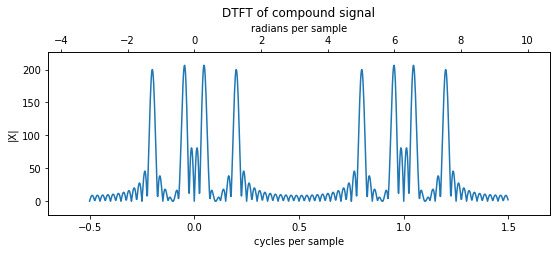

In [28]:
def DTFT(fw, n, x):
    X = 0
    for i in range(n):
        X += x[i] * np.power(np.e, -2j * np.pi * i * fw)
    return X

n = 40
mx = n/2000

t = np.linspace(0, mx, n, False)
x = 10 * (np.sin(100 * 2 * np.pi * t) + np.sin(400 * 2 * np.pi * t))

fw = np.linspace(-0.5, 1.5, 1000, False)
out = []
for freq in fw:
    out.append(DTFT(freq, n, x))
    
setup_plot('DTFT of compound signal', '|X|', 'cycles per sample')
pl.plot(fw, np.abs(out));
add_top_axis(2 * np.pi * fw, 'radians per sample')